In [1]:
import pandas as pd
from io import StringIO

In [2]:
csv_data = \
    '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

Удаление строк, где есть nan:

In [5]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


Удаление столбцов, где есть nan:

In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


Удаление строк со значениями nan во всех столбцах:

In [7]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


Удаление строк, которые содержат менее 4 вещественных значений:

In [8]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


## Интерполяция

Условный расчет на основе среднего:

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

In [10]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [12]:
pd.DataFrame(imputed_data, columns=['A', 'B', 'C', 'D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Categorical features

In [13]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [14]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [15]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [16]:
class_mapping = {label: i for i, label in
                 enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [17]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [18]:
inv_size_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [19]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [20]:
yy = class_le.inverse_transform(y)

In [21]:
df['classlabel'] = yy
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [22]:
df.columns[:-1].values

array(['color', 'size', 'price'], dtype=object)

In [23]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

!!! error color: red > green > blue

## one-hot encoding

In [24]:
X[:, 0].reshape(-1, 1)

array([[1],
       [2],
       [0]], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder

X = df[df.columns[:-1].values].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [26]:
from sklearn.compose import ColumnTransformer

X = df[df.columns[:-1].values].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [27]:
pd.get_dummies(df[['color', 'size', 'price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


Убрать мультиколлениарность (линейную зависимость) можно удалив один из one-hot признаков

In [28]:
pd.get_dummies(df[['color', 'size', 'price']], drop_first=True)

,size,price,color_green,color_red
0,1,10.1,1,0
1,2,13.5,0,1
2,3,15.3,0,0


In [29]:
color_ohe = OneHotEncoder(drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

In [30]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [31]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


# Wine dataset

In [32]:
from sklearn.datasets import load_wine

In [33]:
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target + 1
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [34]:
df = df.reindex(columns=['target'] + list(df.columns[:-1]))
df.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



#### Разбиение на train, test:


In [35]:
df.iloc[:, 0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [36]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

In [37]:
from collections import Counter
Counter(y_train)

Counter({3: 33, 1: 41, 2: 50})

In [38]:
Counter(y_test)

Counter({1: 18, 2: 21, 3: 15})


#### Scaling (масштабирование признаков)


In [39]:
# standartization [-1, 1] (avg = 0, std = 1)
# normalization [0, 1]

arr = np.arange(0, 6)
arr_std = (arr - arr.mean()) / arr.std()
arr_norm = (arr - arr.min()) / (arr.max() - arr.min())

test = np.concatenate((arr.reshape(-1, 1),
                       arr_std.reshape(-1, 1),
                       arr_norm.reshape(-1, 1)), axis=1)

test = pd.DataFrame(test, columns=['I', 'Стандартизированное значение',
                                   'Нормализованное значение'])
test

,I,Стандартизированное значение,Нормализованное значение
0,0.0,-1.46385,0.0
1,1.0,-0.87831,0.2
2,2.0,-0.29277,0.4
3,3.0,0.29277,0.6
4,4.0,0.87831,0.8
5,5.0,1.46385,1.0


Стандартизацию лучше использовать для алгоритмов с градиентным спуском.

Стандартизация сохраняет полезную информацию о выбросах и делает алгоритм менее чувствительным к ним в отличие от min-max scaling.

In [40]:
# min-max scaling (normalization)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# standartization
from sklearn.preprocessing import StandardScaler

scs = StandardScaler()
X_train_std = scs.fit_transform(X_train)
X_test_std = scs.fit_transform(X_test)

#### Regularization
Штраф более крупным весам. Уменьшение весов в сторону нуля и сокращение зависимости модели от обучающих данных.

L2 - квадратичный штраф. Ограничение на веса.
<img src="pic/L2.png" width="300"/>

L1 - абсолютный штраф. Более вероятно, что оптимум расположится на осях, что способствует разреженности весов (нулевые значения). Отсечение признаков.
<img src="pic/L1.png" width="300"/>

Сила регуляризации регулируется параметром C. Чем меньше C, тем больше регуляризация (w стремятся к 0)

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Точность на обуч данных:', lr.score(X_train_std, y_train))
print('Точность на тест данных:', lr.score(X_test_std, y_test))

Точность на обуч данных: 1.0
Точность на тест данных: 1.0


In [45]:
lr.intercept_  # w0 or b

array([-1.26336225, -1.21608137, -2.37029407])

In [46]:
lr.coef_  # wi

array([[ 1.24554469,  0.1810169 ,  0.74232988, -1.15967966,  0.        ,
         0.        ,  1.17397506,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5439614 ,  2.51108433],
       [-1.53713709, -0.38730323, -0.9952134 ,  0.3649386 , -0.05945195,
         0.        ,  0.66796335,  0.        ,  0.        , -1.93427236,
         1.23343271,  0.        , -2.23162116],
       [ 0.13574538,  0.16834072,  0.3571787 ,  0.        ,  0.        ,
         0.        , -2.43831807,  0.        ,  0.        ,  1.56384005,
        -0.81895122, -0.49226149,  0.        ]])

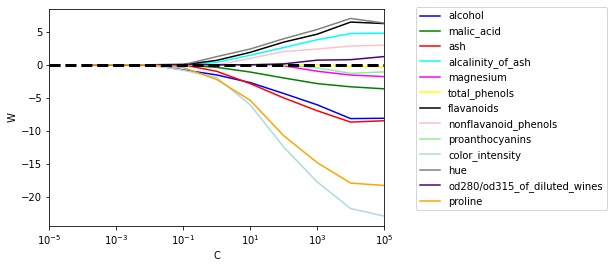

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c,
                            solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('W')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

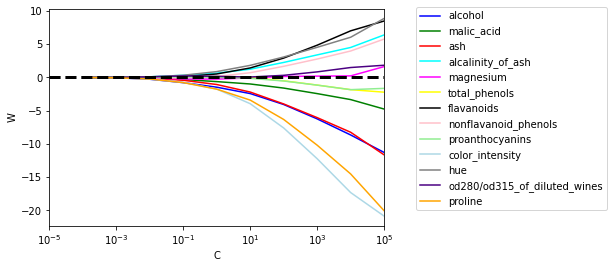

In [51]:
fig = plt.figure()
ax = plt.subplot()
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l2', C=10.**c,
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('W')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

#### Алгоритмы последовательного выбора признаков
Понижение размерности последовательным обратным выбором (sequential backward selection - SBS). Понижение размерности первоначального пространства признаков с минимальным спадом эффективности классификатора для улучшения показателей вычислительной эффективности. Может усилить прогнозирующую силу модели, если имеется факт переобучения.

In [53]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [54]:
class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.estimator = clone(estimator)
        self.scoring = scoring
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

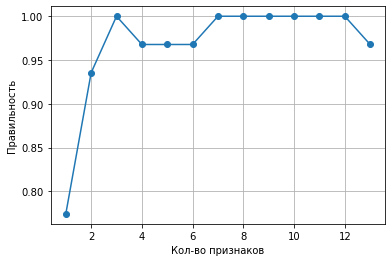

In [155]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylabel('Правильность')
plt.xlabel('Кол-во признаков')
plt.grid()
plt.show()

In [156]:
k3 = list(sbs.subsets_[10])
print(df.columns[1:][k3])

Index(['alcohol', 'malic_acid', 'od280/od315_of_diluted_wines'], dtype='object')


In [157]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

In [59]:
knn.fit(X_train_std, y_train)
print('train: ', knn.score(X_train_std, y_train))
print('test: ', knn.score(X_test_std, y_test))

train:  0.967741935483871
test:  0.9814814814814815


In [60]:
knn.fit(X_train_std[:, k3], y_train)
print('train: ', knn.score(X_train_std[:, k3], y_train))
print('test: ', knn.score(X_test_std[:, k3], y_test))

train:  0.9516129032258065
test:  0.9259259259259259


##### test:

In [167]:
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X_train_std, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=3)

In [168]:
mask = sfs.get_support()

In [169]:
X_train_std_sec = sfs.transform(X_train_std)

In [170]:
knn.fit(X_train_std[:, mask], y_train)
print('train: ', knn.score(X_train_std[:, mask], y_train))
print('test: ', knn.score(X_test_std[:, mask], y_test))

train:  0.967741935483871
test:  0.9629629629629629


In [171]:
mask = np.where(mask == True)[0]

In [172]:
mask

array([ 6,  9, 12], dtype=int64)

In [173]:
type(mask)

numpy.ndarray

In [177]:
df.iloc[:, mask].head()

,total_phenols,proanthocyanins,od280/od315_of_diluted_wines
0,2.80,2.29,3.92
1,2.65,1.28,3.40
2,2.80,2.81,3.17
3,3.85,2.18,3.45
4,2.80,1.82,2.93


In [181]:
df.iloc[:, 1:].head().iloc[:, k3]

,alcohol,malic_acid,od280/od315_of_diluted_wines
0,14.23,1.71,3.92
1,13.20,1.78,3.40
2,13.16,2.36,3.17
3,14.37,1.95,3.45
4,13.24,2.59,2.93


#### Оценка важности признаков с помощью случайных лесов

In [182]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [184]:
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [186]:
indices = np.argsort(importances)[::-1]
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2], dtype=int64)

In [187]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) proline                        0.185453
 2) flavanoids                     0.174751
 3) color_intensity                0.143920
 4) od280/od315_of_diluted_wines   0.136162
 5) alcohol                        0.118529
 6) hue                            0.058739
 7) total_phenols                  0.050872
 8) magnesium                      0.031357
 9) malic_acid                     0.025648
10) proanthocyanins                0.025570
11) alcalinity_of_ash              0.022366
12) nonflavanoid_phenols           0.013354
13) ash                            0.013279


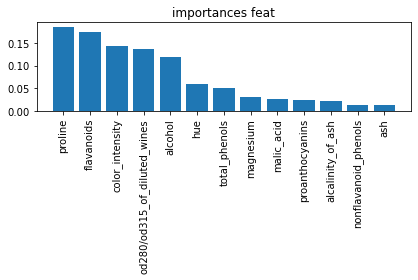

In [193]:
plt.title('importances feat')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [210]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

In [211]:
X_selected.shape

(124, 5)

In [212]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) proline                        0.185453
 2) flavanoids                     0.174751
 3) color_intensity                0.143920
 4) od280/od315_of_diluted_wines   0.136162
 5) alcohol                        0.118529


In [ ]:
стр 183